# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [97]:
import numpy as np
np.random.seed(42) # For reproducibility
def initialize_network(input_size, hidden_layers, output_size):
    num_nodes_previous = input_size
    network = {} # Initialize the network as an empty dictionary
    
    # Your code should contain the weights and biases
    for layer in range(len(hidden_layers)+1):
        # name the layer
        if layer == len(hidden_layers):
            layer_name = 'output'
            num_nodes = output_size
        else:
            layer_name = 'layer_{}'.format(layer+1)
            num_nodes = hidden_layers[layer]

        # initialize weights and biases
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights':np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias':np.around(np.random.uniform(size=1), decimals=2)
            }
            
        num_nodes_previous = num_nodes


    return network

    
 

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("Kiyrah Keith + Initialized Network:", network)

Kiyrah Keith + Initialized Network: {'layer_1': {'node_1': {'weights': array([0.37, 0.95, 0.73]), 'bias': array([0.6])}, 'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])}, 'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])}, 'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}}, 'layer_2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]), 'bias': array([0.61])}, 'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]), 'bias': array([0.79])}, 'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]), 'bias': array([0.61])}}, 'output': {'node_1': {'weights': array([0.17, 0.07, 0.95]), 'bias': array([0.97])}}}


## Step 2: Compute Weighted Sum

In [99]:
def compute_weighted_sum(inputs, weights, bias):
    # Please numpy dot to calcuate the compute weighted with linear 
    return np.sum(np.dot(inputs, weights)) + bias
    

# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network['layer_1']  # First layer

Z = compute_weighted_sum(inputs, layer['node_1']['weights'], layer['node_1']['bias'])
print("Kiyrah Keith + Weighted Sum:", Z)

Kiyrah Keith + Weighted Sum: [1.048]


## Step 3: Compute Node Activation

In [101]:
def sigmoid(Z):
    return 1 / (1+np.exp(-Z)) # Return the sigmoid function calculation


def sigmoid_derivative(A):
    return A * (1-A) # Return the calculation of the sigmoid derivative


# Compute activation for the weighted sum
A = sigmoid(Z)
print("Kiyrah Keith + Activation:", A)

Kiyrah Keith + Activation: [0.74039066]


## Step 4: Perform Forward Propagation

In [103]:
def forward_propagation(inputs, network):
    activations = [inputs] # Begin with the input layer
    for layer in network.values(): # Loop through each layer in the network
        z = []
        a = []
        for node in layer.values(): # Loop through each node in the layer
            # Calculate Z
            z_value = np.dot(activations[-1], node['weights']) + node['bias']
            z.append(z_value)
            a.append(sigmoid(z_value)) # Calculate activation using sigmoid
        activations.append(np.array(a).flatten())
    return activations


# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Kiyrah Keith + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([0.74039066, 0.7286927 , 0.80439608, 0.65813632]), array([0.85167349, 0.84623151, 0.83715521]), array([0.87753786])]
Kiyrah Keith + Final Output: [0.87753786]


## Step 5: Backpropagation

In [105]:
def backpropagation(network, activations, y_true):
    error = sigmoid(activations[-1]) - y_true[0]
    
    gradients = {} # Create an empty list to store the gradients
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])
    gradients['output'] = delta_output
    
    # Loop through each layer in the network, moving backwards from the output
    for layer_idx in reversed(range(len(network))):
        #Get the name of the current layer
        layer_name = list(network.keys())[layer_idx]

        if layer_name == 'output':
            delta = gradients['output']
        else:
            # compute the delta for each hidden layer
            next_layer_name = list(network.keys())[layer_idx + 1]
            next_layer = network[next_layer_name]
            weight_matrix = np.array([node['weights'] for node in next_layer.values()])
            delta = np.dot(delta, weight_matrix) * sigmoid_derivative(activations[layer_idx+1])

        gradients[layer_name] = delta[0,]
        
    return gradients


# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Kiyrah Keith + Gradients:", gradients)

Kiyrah Keith + Gradients: {'output': array([-0.01316041]), 'layer_2': array([-0.00028262, -0.00011987, -0.00170441]), 'layer_1': array([-8.50445351e-05, -2.07777460e-04, -1.84324445e-04, -5.00211985e-05])}


## Step 6: Update Weights

In [107]:
gradients


{'output': array([-0.01316041]),
 'layer_2': array([-0.00028262, -0.00011987, -0.00170441]),
 'layer_1': array([-8.50445351e-05, -2.07777460e-04, -1.84324445e-04, -5.00211985e-05])}

In [109]:
activations


[array([[0.5, 0.2, 0.1]]),
 array([0.74039066, 0.7286927 , 0.80439608, 0.65813632]),
 array([0.85167349, 0.84623151, 0.83715521]),
 array([0.87753786])]

In [111]:
network

{'layer_1': {'node_1': {'weights': array([0.37, 0.95, 0.73]),
   'bias': array([0.6])},
  'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])},
  'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])},
  'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}},
 'layer_2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]),
   'bias': array([0.61])},
  'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]),
   'bias': array([0.79])},
  'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]),
   'bias': array([0.61])}},
 'output': {'node_1': {'weights': array([0.17, 0.07, 0.95]),
   'bias': array([0.97])}}}

In [113]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    for layer_idx in reversed(range(len(network))):
        layer_name = list(network.keys())[layer_idx]
        current_layer = network[layer_name]
        
    
        for node_idx, (node_name, node_data) in enumerate(current_layer.items()):
            # Get the activations from the previous layer (or input for the first hidden layer)
            a_prev = activations[layer_idx+1]

            # Compute the gradients for weights (dW) and biases (db)
            dW = np.dot(a_prev.T, gradients[layer_name])  # Gradient of weights
            db = np.sum(gradients[layer_name], axis=0, keepdims=True)           # Gradient of biases

            
            # Update weights and biases using gradient descent
            current_layer[node_name]['weights'] -= learning_rate * dW  # Update weights
            current_layer[node_name]['bias'] -= learning_rate * db     # Update bias

  
# Update weights with a learning rate of 0.1
# print("Original network: ", network)
update_weights(network, gradients, learning_rate=0.1)
print("Kiyrah Keith + Updated Network:", network)

Kiyrah Keith + Updated Network: {'layer_1': {'node_1': {'weights': array([0.37003956, 0.95003956, 0.73003956]), 'bias': array([0.60005272])}, 'node_2': {'weights': array([0.16003956, 0.16003956, 0.06003956]), 'bias': array([0.87005272])}, 'node_3': {'weights': array([0.60003956, 0.71003956, 0.02003956]), 'bias': array([0.97005272])}, 'node_4': {'weights': array([0.83003956, 0.21003956, 0.18003956]), 'bias': array([0.18005272])}}, 'layer_2': {'node_1': {'weights': array([0.3001769, 0.5201769, 0.4301769, 0.2901769]), 'bias': array([0.61021069])}, 'node_2': {'weights': array([0.1401769, 0.2901769, 0.3701769, 0.4601769]), 'bias': array([0.79021069])}, 'node_3': {'weights': array([0.2001769, 0.5101769, 0.5901769, 0.0501769]), 'bias': array([0.61021069])}}, 'output': {'node_1': {'weights': array([0.17115488, 0.07115488, 0.95115488]), 'bias': array([0.97131604])}}}


## Step 7: Visualizing Loss Changes

In [115]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


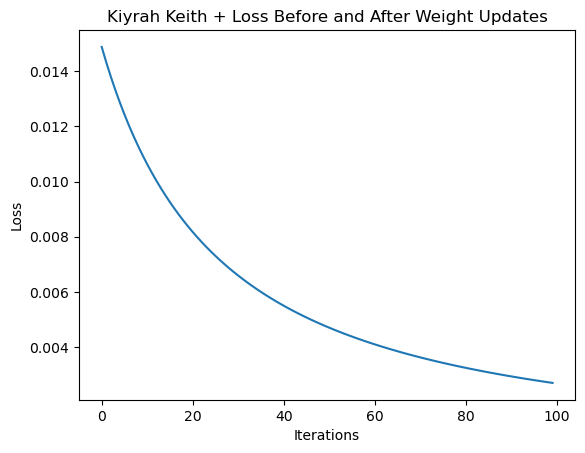

In [117]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.5

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    activations = forward_propagation(inputs, network)

    loss = compute_loss(y_true, activations[-1])
    losses.append(loss)

    # gradients = backpropagation function
    # update_weights
    gradients = backpropagation(network, activations, y_true)
    update_weights(network, gradients, learning_rate)

    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Kiyrah Keith + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code